<font color='blue'>
    
# PROSPER + Openserver + Phyton
# Sensitivity Analysis for Multi Layer Well
    
</font>

## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from collections import defaultdict       # library to create var dictionaries
from openserver import OpenServer
from IPython.display import Javascript    # run multiple cells at once
from IPython.display import display_html  # Display Multiple Data Frames in one cell
from IPython.display import clear_output  # Clear output cell

## 2. Input Variables

In [2]:
## RESERVOIR PRESSURE - Uniform distribution
Pr_L1_low, Pr_L1_high= 2000, 3000 # Pressure Layer 1
Pr_L2_low, Pr_L2_high= 2000, 4500 # Pressure Layer 2

## PERMEABILITY
k_Low_limit, k_High_limit = 0.001, 10000 # Permeability limits to truncate distribution. Avoid negative permeability

k_L1_mean, k_L1_SD= 7, 6 # Permeability Layer 1
k_L2_mean, k_L2_SD= 5, 4 # Permeability Layer 2

## RESERVOIR HEIGHT
h_Low_limit, h_High_limit = 0.1, 500 #limits to truncate distribution
h_L1_mean, h_L1_SD= 20, 6 # Layer 1
h_L2_mean, h_L2_SD= 50, 4 # Layer 2

## Skin
S_Low_limit, S_High_limit = -5, 200 #limits to truncate distribution
S_L1_mean, S_L1_SD= 2, 6 # Layer 1
S_L2_mean, S_L2_SD= 5, 4 # Layer 2

## WGR
WGR_Low_limit, WGR_High_limit = 0, 1000 #limits to truncate distribution
WGR_L1_mean, WGR_L1_SD= 50, 6 # Layer 1
WGR_L2_mean, WGR_L2_SD= 15, 4 # Layer 2

## Drainage Area - Uniform distribution 
DA_L1_low, DA_L1_high= 200, 300 # Layer 1
DA_L2_low, DA_L2_high= 200, 400 # Layer 2

## Top Node Pressure
Top_Press_low, Top_Press_high= 200, 1000 # Top Node Pressure limits

## 3. Plot input variables distributions

In [3]:
### Run multiple Cells to create Input variable distributions ###
Javascript("Jupyter.notebook.execute_cell_range(7,20)")

<IPython.core.display.Javascript object>

In [4]:
### Set RGB color variables ###
c_red = (255/255, 0/255, 0/255) # red
c_blu = (0/255, 0/255, 255/255) # Blue
c_gre = (0/255, 255/255, 0/255) # Green
c_ora = (255/255, 165/255, 0/255) # Orange
c_pale_gre = (152/255,251/255,152/255) # Pale green
c_Dred = (139/255,0/255,0/255) # Dark red

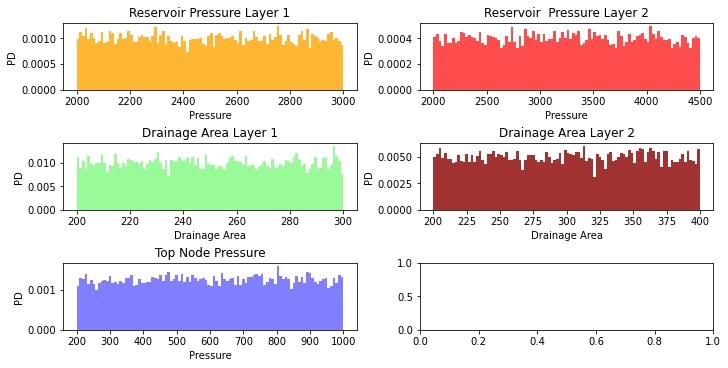

In [5]:
fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(10,5), layout ='constrained')

Pr_L1 = np.random.uniform(low=Pr_L1_low, high= Pr_L1_high, size = 10000)
# Graficar distribución
ax[0,0].hist(Pr_L1, bins=100, density=True, align='mid', color=c_ora, alpha=0.8)
ax[0,0].set_xlabel('Pressure')
ax[0,0].set_ylabel('PD')
ax[0,0].set_title('Reservoir Pressure Layer 1')


Pr_L2 = np.random.uniform(low=Pr_L2_low, high= Pr_L2_high, size = 10000)
# Graficar distribución
ax[0,1].hist(Pr_L2, bins=100, density=True, align='mid', color=c_red, alpha=0.7)
ax[0,1].set_xlabel('Pressure')
ax[0,1].set_ylabel('PD')
ax[0,1].set_title('Reservoir  Pressure Layer 2')

DA_L1 = np.random.uniform(low = DA_L1_low, high = DA_L1_high, size = 10000)
# Graficar distribución
ax[1,0].hist(DA_L1, bins=100, density=True, align='mid', color=c_pale_gre, alpha=1)
ax[1,0].set_xlabel('Drainage Area')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('Drainage Area Layer 1')

DA_L2 = np.random.uniform(low = DA_L2_low, high = DA_L2_high, size = 10000)
# Graficar distribución
ax[1,1].hist(DA_L2, bins=100, density=True, align='mid', color=c_Dred, alpha=0.8)
ax[1,1].set_xlabel('Drainage Area')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('Drainage Area Layer 2')


Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 10000)
# Graficar distribución
ax[2,0].hist(Top_Press, bins=100, density=True, align='mid', color=c_blu, alpha=0.5)
ax[2,0].set_xlabel('Pressure')
ax[2,0].set_ylabel('PD')
ax[2,0].set_title('Top Node Pressure');

### Create function to plot normal distributions

In [6]:
def Generate_normal_and_Truncated(V_mu,V_SD,V_samples,V_Low_limit,V_High_limit, V_x_Label, V_Title, n_col):
    
    N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution
    
    # Plot Normal Distribution
    AX[0,n_col].hist(N_Samples, bins=100, density=True, align='mid', color=(RBG), alpha=0.7)
    AX[0,n_col].set_xlabel(V_x_Label)
    AX[0,n_col].set_ylabel('Probability Density')
    AX[0,n_col].set_title(V_Title)
    x_axis = AX[0,n_col].set_xlim()

    ## generate data for truncated normal distribution
    NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD,size=V_samples)

    ## Plot truncated Normal distribution
    AX[1,n_col].hist(NT_Samples, bins=100, density=True, align='mid', color=(RBG), alpha=0.4)
    AX[1,n_col].set_xlabel(V_x_Label)
    AX[1,n_col].set_ylabel('Probability Density')
    AX[1,n_col].set_title(V_Title + ' (TRUNCATED)')
    AX[1,n_col].set_xlim(x_axis)


## 3.2 Permeability Distributions

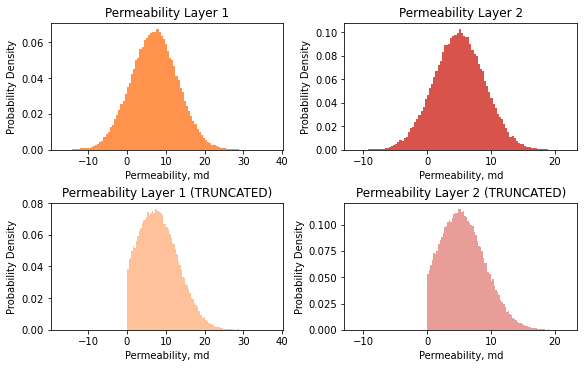

In [7]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'Permeability Layer 1', 'Permeability, md'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(k_L1_mean, k_L1_SD, 100000,k_Low_limit,k_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Permeability Layer 2', 'Permeability, md'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(k_L2_mean, k_L2_SD, 100000,k_Low_limit,k_High_limit, V_x_Label, V_Title, 1)

## 3.3 Height Distributions

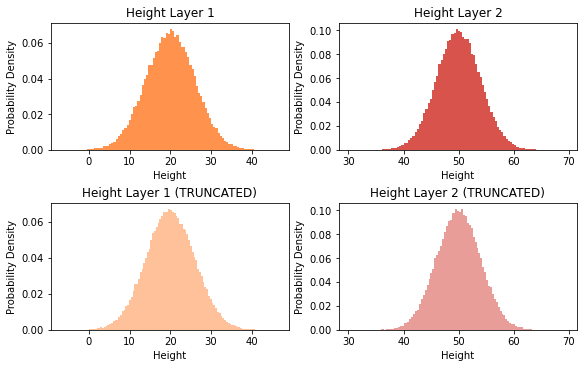

In [8]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'Height Layer 1', 'Height'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(h_L1_mean, h_L1_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Height Layer 2', 'Height'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(h_L2_mean, h_L2_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 1)

## 3.4 Skin Distributions

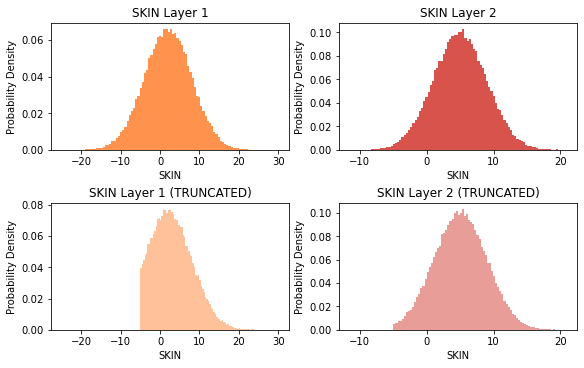

In [9]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'SKIN Layer 1', 'SKIN'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(S_L1_mean, S_L1_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'SKIN Layer 2', 'SKIN'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(S_L2_mean, S_L2_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 1)

## 3.5 WGR Distribution

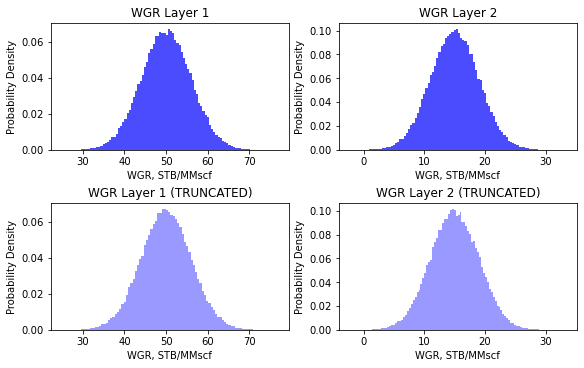

In [10]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'WGR Layer 1', 'WGR, STB/MMscf'
RBG = c_blu
Generate_normal_and_Truncated(WGR_L1_mean, WGR_L1_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'WGR Layer 2', 'WGR, STB/MMscf'
RBG = c_blu
Generate_normal_and_Truncated(WGR_L2_mean, WGR_L2_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 1)

# 4. Start calc for sensitivity analysis (PROSPER)

In [15]:

## Create Dictionaries to fill inputs, results ##
## Everytime this cell is run the dictionary variables are reset ##

my_dict = defaultdict(list) # dictionary to save VLP and IPR Curves
my_dict_sol = defaultdict(list) # dictionary to save ALL Solutions
my_dict_sol_int = defaultdict(list) # dictionary to save iterations with solutions (Qg > 0)
my_dict_input_S = defaultdict(list) # dictionary to save Input WITH solution
my_dict_input_NS = defaultdict(list) # dictionary to save Input WITHOUT solution
my_dict_input_vals = defaultdict(list) # dictionary to save Inputs from loop

c = OpenServer()
c.connect()

Pr = 3000
iter = 2000
n = range(iter)

for i in n:
    
    print('Index: ', i)
    
    ## Reservoir Pressure ##
    Pr_L1 = np.random.uniform(low=Pr_L1_low, high= Pr_L1_high, size = 1)
    my_dict_input_vals['Pr_L1'].extend(Pr_L1)
 
    Pr_L2 = np.random.uniform(low=Pr_L2_low, high= Pr_L2_high, size = 1)
    my_dict_input_vals['Pr_L2'].extend(Pr_L2)
    
    # PROSPER.SIN.IPR.Single.MLayer[0].DAREA
    DA_L1 = np.random.uniform(low=DA_L1_low, high= DA_L1_high, size = 1)
    my_dict_input_vals['Drainage_Area_L1'].extend(DA_L1)
    
    DA_L2 = np.random.uniform(low=DA_L2_low, high= DA_L2_high, size = 1)
    my_dict_input_vals['Drainage_Area_L2'].extend(DA_L2)
    
    
    #k_L1 = np.random.normal(loc = k_L1_mean, scale = k_L1_SD, size= 1) # normal distribution
    mu = k_L1_mean #mean
    sigma = k_L1_SD #SD
    k_L1 = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['k_L1'].extend(k_L1)
    print('Perm Layer 1 = ', k_L1)
    
    
    #k_L2 = np.random.normal(loc = k_L2_mean, scale = k_L2_SD, size= 1) # normal distribution
    mu = k_L2_mean #mean
    sigma = k_L2_SD #SD
    k_L2 = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['k_L2'].extend(k_L2)   
    print('Perm Layer 2 = ', k_L2)

    
    mu = h_L1_mean #mean
    sigma = h_L1_SD #SD
    h_L1 = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['h_L1'].extend(h_L1)   
    print('Height L1 = ', h_L1)
    
    mu = h_L2_mean #mean
    sigma = h_L2_SD #SD
    h_L2 = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['h_L2'].extend(h_L2)   
    print('Height L2 = ', h_L2)    
 
    
    mu = S_L1_mean #mean
    sigma = S_L1_SD #SD
    S_L1 = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['S_L1'].extend(S_L1)   
    print('S L1 = ', S_L1)
    
    mu = S_L2_mean #mean
    sigma = S_L2_SD #SD
    S_L2 = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['S_L2'].extend(S_L2)   
    print('S L2 = ', S_L2)  
    
    mu = WGR_L1_mean #mean
    sigma = WGR_L1_SD #SD
    WGR_L1 = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['WGR_L1'].extend(WGR_L1)   
    print('WGR L1 = ', WGR_L1)

    mu = WGR_L2_mean #mean
    sigma = WGR_L2_SD #SD
    WGR_L2 = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['WGR_L2'].extend(WGR_L2)   
    print('WGR L2 = ', WGR_L2)
    
    ## Wellbore radius ##
    Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 1)
    my_dict_input_vals['Top_Press'].extend(Top_Press)
    
    
    
    
    ## Set Layer Pressure
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].PRESSURE', Pr_L1) # Change Reservoir pressure for Layer 1
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].PRESSURE', Pr_L2) # Change Reservoir pressure for Layer 2
    
    ## Set Layer Permeability
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].PERM', k_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].PERM', k_L2)
    
    ## Set Layer Height
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].HEIGHT', h_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].HEIGHT', h_L2)    
    
    ## Set Skin
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].SKIN', S_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].SKIN', S_L2) 
    
    ## Set WGR
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].WC', WGR_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].WC', WGR_L2) 
    
    ## Drainage Area
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].DAREA', DA_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].DAREA', DA_L2)
    
    ## Top Node Pressure
    c.DoSet('PROSPER.ANL.SYS.Pres', Top_Press)
    
    
    
    ## Calculate new IPR ##
    c.DoCmd('PROSPER.IPR.CALC')

    ## Calculate model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution

    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    #print(Gas_Curve)
    print(Gas_Sol)
    print(BHP_SOL)
    
    T_val = 'Sol_Gas'
    my_dict_sol[T_val].extend([Gas_Sol])
    
    T_val = 'Sol_Pressure'
    my_dict_sol[T_val].extend([BHP_SOL])
    
    ## Insert Input Val to Dictionary When Calculation has NO Solution
    if Gas_Sol > 0:
        my_dict_sol_int['Sol_Gas'].extend([Gas_Sol])
        my_dict_sol_int['Sol_Pressure'].extend([BHP_SOL])
        
        my_dict_input_S['Pr_L1'].extend(Pr_L1)
        my_dict_input_S['Pr_L2'].extend(Pr_L2)
        my_dict_input_S['Drainage_Area_L1'].extend(DA_L1)
        my_dict_input_S['Drainage_Area_L2'].extend(DA_L2)
        my_dict_input_S['k_L1'].extend(k_L1)
        my_dict_input_S['k_L2'].extend(k_L2)
        my_dict_input_S['h_L1'].extend(h_L1)
        my_dict_input_S['h_L2'].extend(h_L2)
        my_dict_input_S['S_L1'].extend(S_L1)
        my_dict_input_S['S_L2'].extend(S_L2)
        my_dict_input_S['WGR_L1'].extend(WGR_L1)
        my_dict_input_S['WGR_L2'].extend(WGR_L2)
        my_dict_input_S['Top_Press'].extend(Top_Press)
        
    if Gas_Sol == 0: 
        my_dict_input_NS['Pr_L1'].extend(Pr_L1)
        my_dict_input_NS['Pr_L2'].extend(Pr_L2)
        my_dict_input_NS['Drainage_Area_L1'].extend(DA_L1)
        my_dict_input_NS['Drainage_Area_L2'].extend(DA_L2)
        my_dict_input_NS['k_L1'].extend(k_L1)
        my_dict_input_NS['k_L2'].extend(k_L2)
        my_dict_input_NS['h_L1'].extend(h_L1)
        my_dict_input_NS['h_L2'].extend(h_L2)
        my_dict_input_NS['S_L1'].extend(S_L1)
        my_dict_input_NS['S_L2'].extend(S_L2)
        my_dict_input_NS['WGR_L1'].extend(WGR_L1)
        my_dict_input_NS['WGR_L2'].extend(WGR_L2)
        my_dict_input_NS['Top_Press'].extend(Top_Press)   
    
    
    ## Insert to Dictionary VLP + IPR ##
    T_val = str(i) + '_G'
    my_dict[T_val].extend(Gas_Curve)
    
    T_val = str(i) + '_IPR'
    my_dict[T_val].extend(IPR_Curve)

    T_val = str(i) + '_VLP'
    my_dict[T_val].extend(VLP_Curve)
    
    if i < iter-1:
        clear_output(wait=True)
    
    
c.disconnect

#type(Gas_Curve)




Index:  1999
Perm Layer 1 =  [8.01051321]
Perm Layer 2 =  [4.15880748]
Height L1 =  [5.72140231]
Height L2 =  [49.89729094]
S L1 =  [3.90083945]
S L2 =  [1.91335823]
WGR L1 =  [47.50491999]
WGR L2 =  [10.69708297]
3.000247002
2032.96887207


<bound method OpenServer.disconnect of <openserver.openserver.OpenServer object at 0x0000025C1FDFF400>>

<font color='blue'>
    
# 5. CONVERT DICTIONARIES TO DATAFRAMES
***
</font>

In [29]:
### Show dictionary content ###
#print(my_dict_input_S)
#clear_output(wait=True)

In [17]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(24,40)")

<IPython.core.display.Javascript object>

In [18]:

df = pd.DataFrame(my_dict)                 # VLP and IPR

dfS = pd.DataFrame(my_dict_sol)            # Solutions ALl iterations (Qg and P)
dfS_In = pd.DataFrame(my_dict_sol_int)     # Solutions Iterations with solutions (Qg and P)

df_In_S = pd.DataFrame(my_dict_input_S)    # Input for iteration with solution 
df_In_NS = pd.DataFrame(my_dict_input_NS)  # Input for iterations without solution
dfIn = pd.DataFrame(my_dict_input_vals)    # Input for all iterations

<font color='blue'>
    
# 6. ANALYZE RESULTS -  PRESSURE + GAS RATE @ Solution Node
***
</font>

## Iterations with and without solution (VLP/IPR intersection)
    There are 2 dictionaries/DataFrames containing the results
    dfS = All iterations
    dfS_In = Iterations with solution (Qg > 0)

In [19]:
dfS.head(i+1).round(2)


,Sol_Gas,Sol_Pressure
0,3.55,2583.18
1,3.02,2312.01
2,7.33,3847.01
3,4.85,3042.60
4,0.00,0.00
...,...,...
1995,5.42,3093.88
1996,0.00,0.00
1997,5.56,3045.06
1998,5.24,3071.76


In [20]:
## Show how many solutions are = 0
Iterations_No_Sol = (dfS['Sol_Gas'] == 0).sum()

print('* Total Iterations = ', i+1)
print('* Iterations without Solution =', Iterations_No_Sol, '(',(Iterations_No_Sol/(i+1)*100).round(2),'%)' )
print('* Iterations with Solution =', (dfS['Sol_Gas'] > 0).sum())
print('')
## Compare mean from total iterations vs iterations with solution
Sol_Gas_mean = dfS['Sol_Gas'].mean()
Sol_Gas_mean_S = dfS_In['Sol_Gas'].mean() # In = intersection VLP vs IPR

print('* Gas Rate Mean = ', round(Sol_Gas_mean,2), 'Total Iterations')
print('* Gas Rate Mean = ', round(Sol_Gas_mean_S,2), 'Iterations with solution (Qg > 0) ');
print('')

Sol_Gas_SD = dfS['Sol_Gas'].std()
print("* Gas Rate Standard Deviation (SD) = ", np.round(Sol_Gas_SD, decimals = 3), 'Total Iterations')

Sol_Gas_SD_S = dfS_In['Sol_Gas'].std()
print("* Gas Rate Standard Deviation (SD) = ", np.round(Sol_Gas_SD_S, decimals = 3), 'Iterations with solution (Qg > 0) ')
print('')

Sol_Pressure_mean = dfS['Sol_Pressure'].mean()
print("* Pressure Solution Mean = ", np.round(Sol_Pressure_mean, decimals = 1))



* Total Iterations =  2000
* Iterations without Solution = 470 ( 23.5 %)
* Iterations with Solution = 1530

* Gas Rate Mean =  3.27 Total Iterations
* Gas Rate Mean =  4.28 Iterations with solution (Qg > 0) 

* Gas Rate Standard Deviation (SD) =  2.127 Total Iterations
* Gas Rate Standard Deviation (SD) =  1.272 Iterations with solution (Qg > 0) 

* Pressure Solution Mean =  2052.0


In [21]:
### Compare DataFrames ###
dfS_col_names =dfS.columns.tolist()
dfS_In_col_names =dfS_In.columns.tolist()

df1 = dfS.head(10)
df2 = dfS_In.head(10)

df1 = df1.style.format(precision=2)
df2 = df2.style.format(precision=2)

df1_styler = df1.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')


display_html(df1_styler._repr_html_() + df2_styler._repr_html_() , raw=True)

,Sol_Gas,Sol_Pressure
0,3.55,2583.18
1,3.02,2312.01
2,7.33,3847.01
3,4.85,3042.60
4,0.00,0.00
5,4.76,2761.64
6,0.00,0.00
7,4.32,2811.46
8,3.35,2666.65
9,4.99,3012.46


In [22]:
### Compare Stadistics ###
dfS_col_names =dfS.columns.tolist()
dfS_In_col_names =dfS_In.columns.tolist()

df1 = pd.DataFrame(dfS.describe(), columns=dfS_col_names)
df2 = pd.DataFrame(dfS_In.describe(), columns=dfS_In_col_names)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,Sol_Gas,Sol_Pressure
count,2000.000000,2000.000000
mean,3.271341,2052.039467
std,2.127442,1206.443254
min,0.000000,0.000000
25%,2.296736,1797.048218
50%,3.610300,2486.860107
75%,4.743931,2858.628601
max,12.523400,4246.834473
,Sol_Gas,Sol_Pressure
count,1530.000000,1530.000000


## QC SOLUTION (P vs Qg) Data Generated with loop

### Plot Solutions as Scatter and Distributions

0.18752204278709086


Text(0.5, 1.0, '')

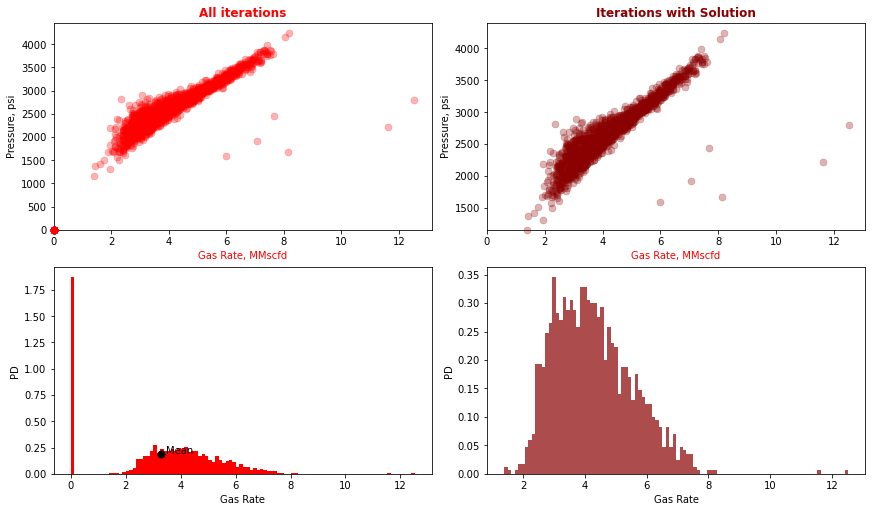

In [23]:
# Plot solutions
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,7), layout ='constrained')

ax[0,0].scatter(dfS['Sol_Gas'], dfS['Sol_Pressure'],  label='Solutions', color=c_red, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[0,0].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[0,0].set_ylabel('Pressure, psi')
ax[0,0].set_title('All iterations', weight='bold', color=c_red)
ax[0,0].set_xlim(left=0)
ax[0,0].set_ylim(bottom=0)

## Generate Histogram for All Iterations ##
ax[1,0].hist(dfS['Sol_Gas'], bins=100, density=True, align='mid', color=c_red, alpha=1)
ax[1,0].set_xlabel('Gas Rate')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('')

## Plot Mean as Dot ##
Sol_Gas_pdf_mean = stats.norm(loc= Sol_Gas_mean, scale = Sol_Gas_SD).pdf(Sol_Gas_mean)
print(Sol_Gas_pdf_mean)
ax[1,0].scatter(Sol_Gas_mean, Sol_Gas_pdf_mean,  label='Solutions',color=(0/255, 0/255, 0/255), alpha=1, s= 50)
ax[1,0].annotate('Mean', (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));


## Create flot for Iterations with Solution ***
ax[0,1].scatter(dfS_In['Sol_Gas'], dfS_In['Sol_Pressure'],  label='Solutions', color=c_Dred, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[0,1].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[0,1].set_ylabel('Pressure, psi')
ax[0,1].set_title('Iterations with Solution', weight='bold', color=c_Dred)

ax[0,1].set_xlim(left=0)
ax[0,1].set_ylim(bottom=0)
pmin = dfS_In['Sol_Pressure'].min()
ax[0,1].set_ylim(bottom=pmin)

## Generate Histogram for Iterations with Solution ##
ax[1,1].hist(dfS_In['Sol_Gas'], bins=100, density=True, align='mid', color=c_Dred, alpha=0.7)
ax[1,1].set_xlabel('Gas Rate')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('')


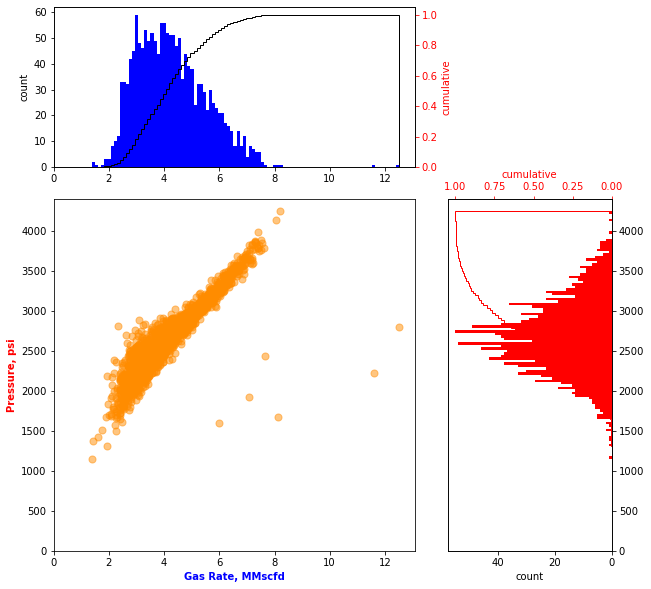

In [24]:

import matplotlib.gridspec as gridspec


x = dfS_In['Sol_Gas']
y = dfS_In['Sol_Pressure']

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 200, alpha=0.5)
#ax_main.set(xlabel="Gas Rate, MMscfd", ylabel="Pressure, psi")
ax_main.set_xlabel('Gas Rate, MMscfd', color=(0/255, 0/255, 255/255), weight='bold')
ax_main.set_ylabel('Pressure, psi', color=(255/255, 0/255, 0/255), weight='bold')

ax_main.set_xlim(left=0)
ax_main.set_ylim(bottom=0)

## Pressure Distribution ##
ax_xDist.hist(x,bins=100,align='mid', color=(0/255, 0/255, 255/255))
ax_xDist.set(ylabel='count')

ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

## Gas Rate Distribution ##
ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color=(255/255, 0/255, 0/255))
ax_yDist.set(xlabel='count')

ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

ax_yDist.invert_xaxis()
ax_yDist.yaxis.tick_right()
ax_yCumDist.invert_xaxis()

plt.show()

<font color='blue'>
    
# 7. ANALYZE INPUT VALUES - GENERATED INSIDE LOOP
***
</font>

## QC Input data generated with Loop

    There are 3 dictionaries/DataFrames containing the results
    dfIn = All iterations
    dfS_In_S = Iterations with solution (Qg > 0)
    df_In_NS = Input for iterations without solution (Qg = 0)

In [25]:
## Show Inputa DataFrame - ALL ITERATIONS
# i is generated inside Loop
dfIn.head(i+1)

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
0,2819.537719,2909.781297,237.760473,259.602491,12.302017,1.175045,14.112176,53.781189,-1.527850,2.270823,38.048251,17.269092,411.217122
1,2391.747727,2409.157713,262.579747,220.528854,9.632715,6.992615,18.291495,54.029495,-1.848006,-0.891137,38.094851,15.796731,639.971590
2,2885.425460,4134.454071,204.616228,293.648520,2.644836,11.989762,11.841674,49.225955,-0.628985,-0.113145,51.854879,17.191047,506.880211
3,2834.886578,3640.319936,227.815688,240.258060,10.959650,11.223587,18.221700,47.840410,-1.057849,7.056861,54.545665,18.203315,922.424004
4,2106.998828,2243.514951,215.195160,339.335539,8.393139,4.218549,10.532226,44.981530,3.028841,10.847308,51.497175,13.500905,754.842864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2936.692671,4183.108501,238.974951,394.567870,0.673826,5.647253,18.471028,45.777834,9.726302,9.812941,53.491319,15.181018,567.197479
1996,2479.300293,3333.652040,270.407704,261.564881,12.695866,3.551170,18.091852,44.958444,4.573698,6.772384,48.592590,20.805882,922.045831
1997,2875.221111,4103.854515,255.634022,274.203958,4.730002,5.120382,18.920838,49.503412,-4.728845,2.033261,55.668559,11.053498,386.546895
1998,2725.860327,3799.076911,232.144048,362.175102,5.374635,8.060504,17.060940,45.688315,-1.361103,4.928705,52.007030,18.927092,280.466698


## View DataFrame iterations with solutions (Qg > 0)

In [26]:
## Show Inputa DataFrame - ONLY ITERATIONS WITH SOLUTIONS
df_In_S

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
0,2819.537719,2909.781297,237.760473,259.602491,12.302017,1.175045,14.112176,53.781189,-1.527850,2.270823,38.048251,17.269092,411.217122
1,2391.747727,2409.157713,262.579747,220.528854,9.632715,6.992615,18.291495,54.029495,-1.848006,-0.891137,38.094851,15.796731,639.971590
2,2885.425460,4134.454071,204.616228,293.648520,2.644836,11.989762,11.841674,49.225955,-0.628985,-0.113145,51.854879,17.191047,506.880211
3,2834.886578,3640.319936,227.815688,240.258060,10.959650,11.223587,18.221700,47.840410,-1.057849,7.056861,54.545665,18.203315,922.424004
4,2335.571032,3515.888680,249.884785,202.884973,20.587085,4.080066,15.477740,52.385409,4.302304,-0.064791,38.817738,11.543422,343.561712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,2637.096333,3875.646009,280.220767,309.929398,4.250617,2.307702,15.888618,48.264715,4.381391,-1.162975,55.108574,11.691990,265.957457
1526,2936.692671,4183.108501,238.974951,394.567870,0.673826,5.647253,18.471028,45.777834,9.726302,9.812941,53.491319,15.181018,567.197479
1527,2875.221111,4103.854515,255.634022,274.203958,4.730002,5.120382,18.920838,49.503412,-4.728845,2.033261,55.668559,11.053498,386.546895
1528,2725.860327,3799.076911,232.144048,362.175102,5.374635,8.060504,17.060940,45.688315,-1.361103,4.928705,52.007030,18.927092,280.466698


In [30]:
# Show Input Data Statistics - ALL ITERATIONS
dfIn.describe()

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2510.630310,3249.853868,251.498560,299.159817,8.445499,5.782776,19.975052,50.018383,3.388696,5.040360,49.935282,15.014346,600.044266
std,287.085528,735.765049,28.462890,56.805641,5.065947,3.434472,6.034262,4.022888,5.058076,3.973266,5.898134,3.943478,231.972175
min,2000.525375,2000.112853,200.081707,200.190221,0.006646,0.015425,0.304825,34.922536,-4.994837,-4.766371,27.734655,2.687314,200.144689
25%,2266.608770,2594.958890,227.406801,250.618301,4.475367,3.052252,15.890486,47.410857,-0.536190,2.352922,45.990986,12.422910,407.753527
50%,2519.777689,3216.520995,252.100655,299.184331,7.951380,5.539364,20.049681,49.945102,2.842399,5.068221,49.900993,15.034012,596.925759
75%,2764.228378,3899.060953,275.997084,346.021489,11.972360,8.061730,24.135823,52.774304,6.664585,7.716508,53.884434,17.638151,797.250535
max,2998.269535,4499.096429,299.985774,399.872787,29.481446,19.262452,39.968343,64.768990,25.494555,22.171860,68.684303,27.977425,999.816547


In [31]:
# Show Input Data Statistics - ONLY ITERATIONS WITH SOLUTIONS
df_In_S.describe()

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000
mean,2515.310967,3411.034953,251.193487,298.457551,8.356387,6.081576,19.797794,50.118108,3.528623,5.012902,49.792096,14.917735,538.459088
std,289.200174,692.981286,28.531903,56.508780,4.849981,3.369856,6.123552,4.032678,4.997690,3.882290,5.902497,3.938429,215.268083
min,2000.525375,2005.063403,200.081707,200.284103,0.006646,0.015425,0.304825,34.922536,-4.980962,-4.766371,27.893030,2.687314,200.144689
25%,2266.584209,2856.479003,226.876954,250.636911,4.539290,3.433680,15.694028,47.529972,-0.324390,2.363999,45.846487,12.376527,357.525621
50%,2529.321369,3464.036845,251.630580,296.996285,7.966658,5.864418,19.855543,50.032322,2.965851,5.017131,49.714736,14.935402,520.085687
75%,2767.749110,4032.176330,275.935245,345.324550,11.823519,8.263303,24.021757,52.862615,6.968784,7.626634,53.832166,17.579503,698.942400
max,2997.779795,4499.096429,299.985774,399.872787,25.046316,19.262452,39.968343,64.768990,22.044808,22.171860,68.684303,27.977425,998.920058


In [32]:
# Show Input Data Statistics - ONLY ITERATIONS WITHOUT SOLUTIONS
df_In_NS.describe()

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2495.393278,2725.157996,252.491671,301.445915,8.735589,4.810085,20.552080,49.693747,2.933188,5.129746,50.401400,15.328842,800.523678
std,279.851345,617.367515,28.244436,57.763148,5.708754,3.466227,5.702166,3.977813,5.229392,4.259103,5.865979,3.947701,160.096296
min,2000.864510,2000.112853,200.112270,200.190221,0.009221,0.033409,3.407851,36.393911,-4.994837,-4.637368,27.734655,5.036965,205.080381
25%,2266.636110,2237.633966,229.044988,250.759526,4.222863,1.956773,16.739100,47.276353,-1.433393,2.288110,46.479802,12.655761,701.029724
50%,2490.784525,2551.952580,252.793760,304.768338,7.938160,4.320428,20.719145,49.711044,2.354911,5.289486,50.464461,15.296465,840.235352
75%,2736.704876,3074.444136,276.033597,351.023830,12.724946,7.177313,24.568196,52.429934,5.951887,7.983694,54.176951,18.061510,924.770215
max,2998.269535,4471.829676,299.982252,399.547414,29.481446,16.785458,35.004281,59.648814,25.494555,17.779823,65.991967,26.222308,999.816547


## Plot Distribution for input variables (Iterations with Solution)

Total Input Variables =  13
Rows to Plot =  5
Plot Distribution for input variables (Iterations with Solution)


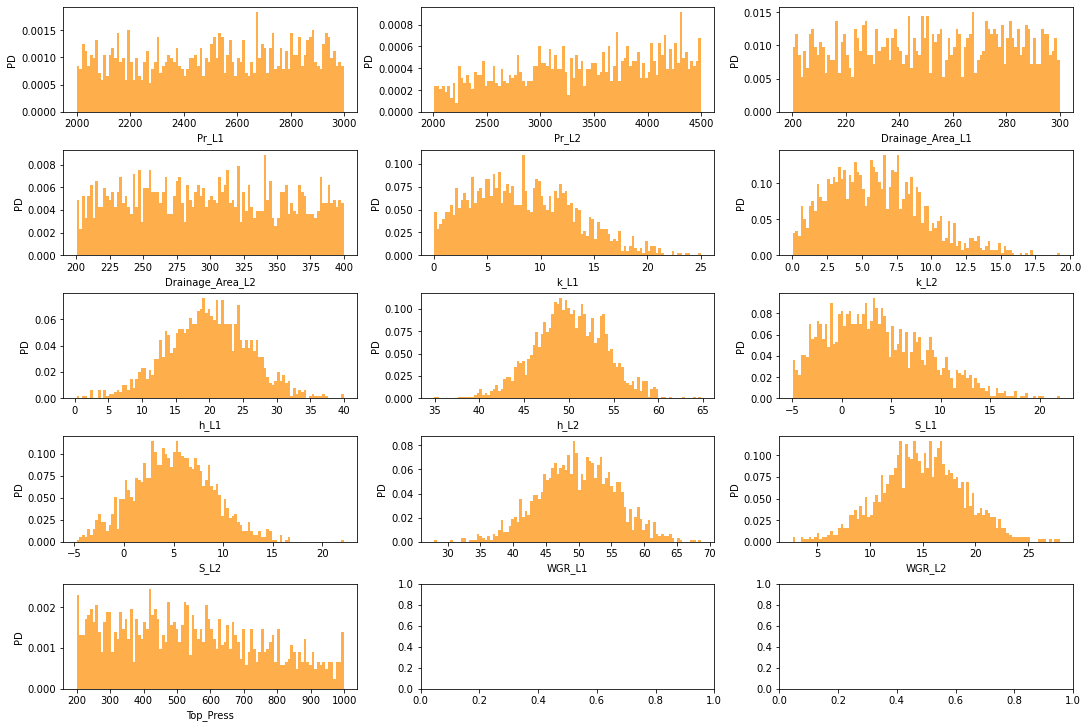

In [33]:
## Get Column names
df_col_names_Inputs = df_In_S.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:

    AX[xx,yy].hist(df_In_S[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=(255/255, 140/255, 0/255), alpha=0.7)
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].set_ylabel('PD')
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1

print('Plot Distribution for input variables (Iterations with Solution)')

## Plot Distribution for input variables (Iterations without Solution, Qg = 0)

Total Input Variables =  13
Rows to Plot =  5
Plot Distribution for input variables (Iterations without Solution, Qg = 0)


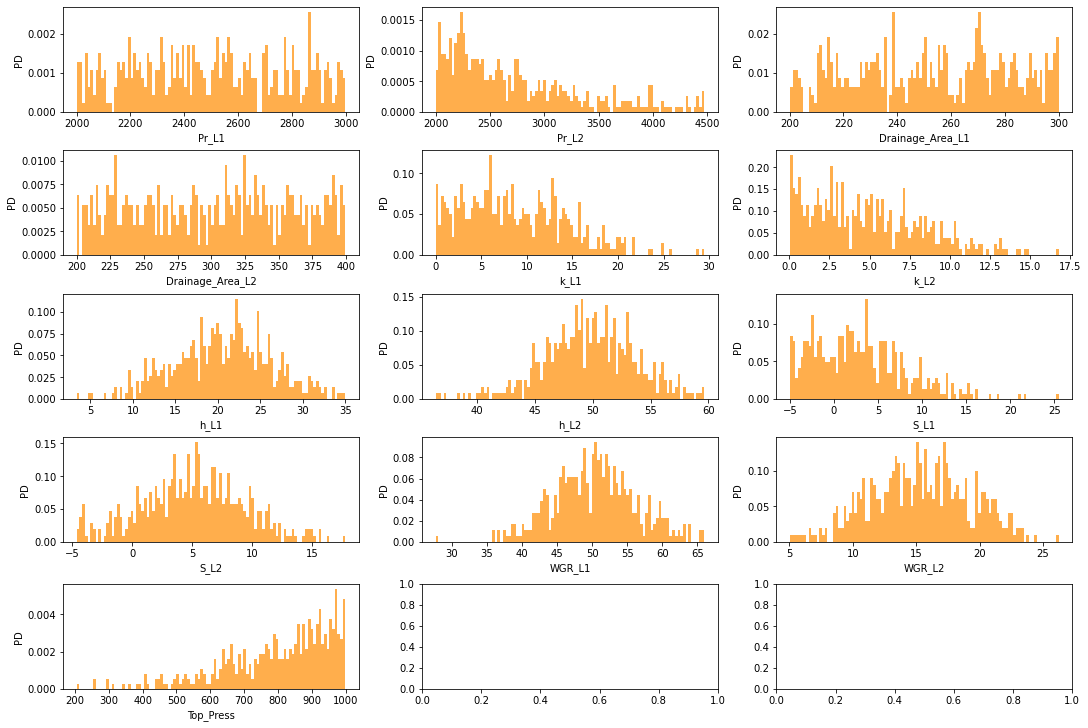

In [34]:
## Get Column names
df_col_names_Inputs =df_In_NS.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:

    AX[xx,yy].hist(df_In_NS[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=(255/255, 140/255, 0/255), alpha=0.7)
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].set_ylabel('PD')
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1
        
print('Plot Distribution for input variables (Iterations without Solution, Qg = 0)')

## Plot Distributions with solution and without solution next to each other

Total Input Variables =  13
Rows to Plot =  5


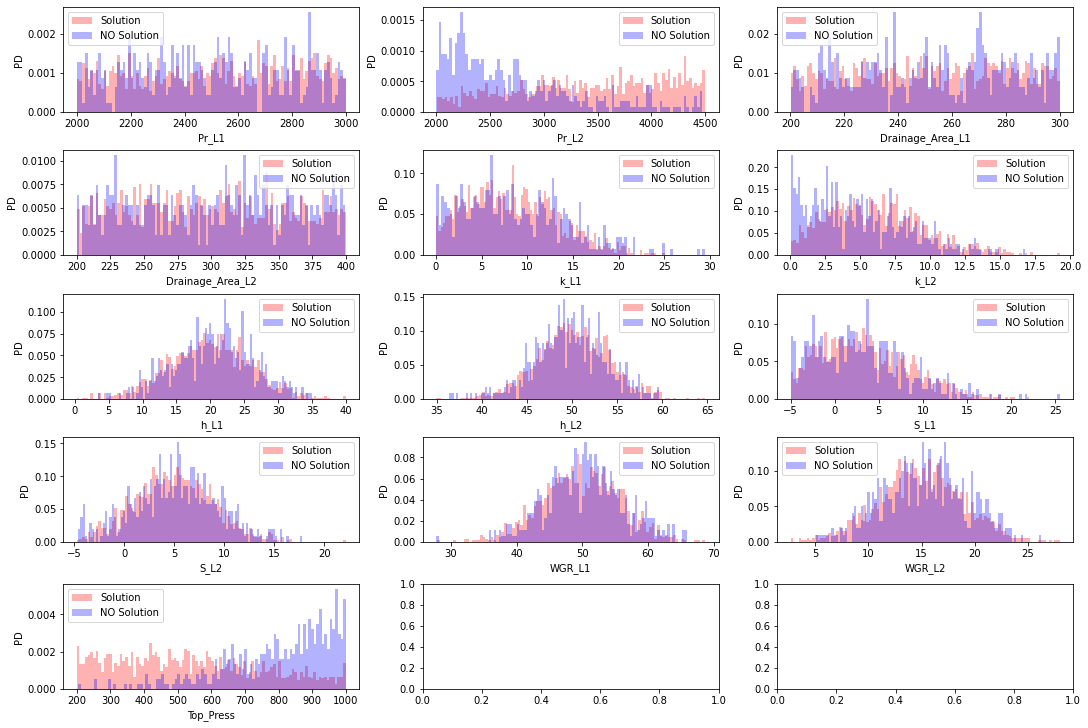

In [35]:
## Get Column names
df_col_names_Inputs = df_In_S.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:

    AX[xx,yy].hist(df_In_S[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=c_red, alpha=0.3, label='Solution')
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].set_ylabel('PD')

    AX[xx,yy].hist(df_In_NS[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=c_blu, alpha=0.3, label='NO Solution')
    AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
    AX[xx,yy].legend()
    #plt.legend()
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1

<font color='blue'>
    
# 8. Create cross-plots input vs solutions
***
</font>



In [36]:
## Get Column names
df_col_names =df.columns.tolist()
df_col_names_In = dfIn.columns.tolist()
print(df_col_names_In)

['Pr_L1', 'Pr_L2', 'Drainage_Area_L1', 'Drainage_Area_L2', 'k_L1', 'k_L2', 'h_L1', 'h_L2', 'S_L1', 'S_L2', 'WGR_L1', 'WGR_L2', 'Top_Press']


## Cross-plots for all Iterations

Total Input Variables =  13
Rows to Plot =  5


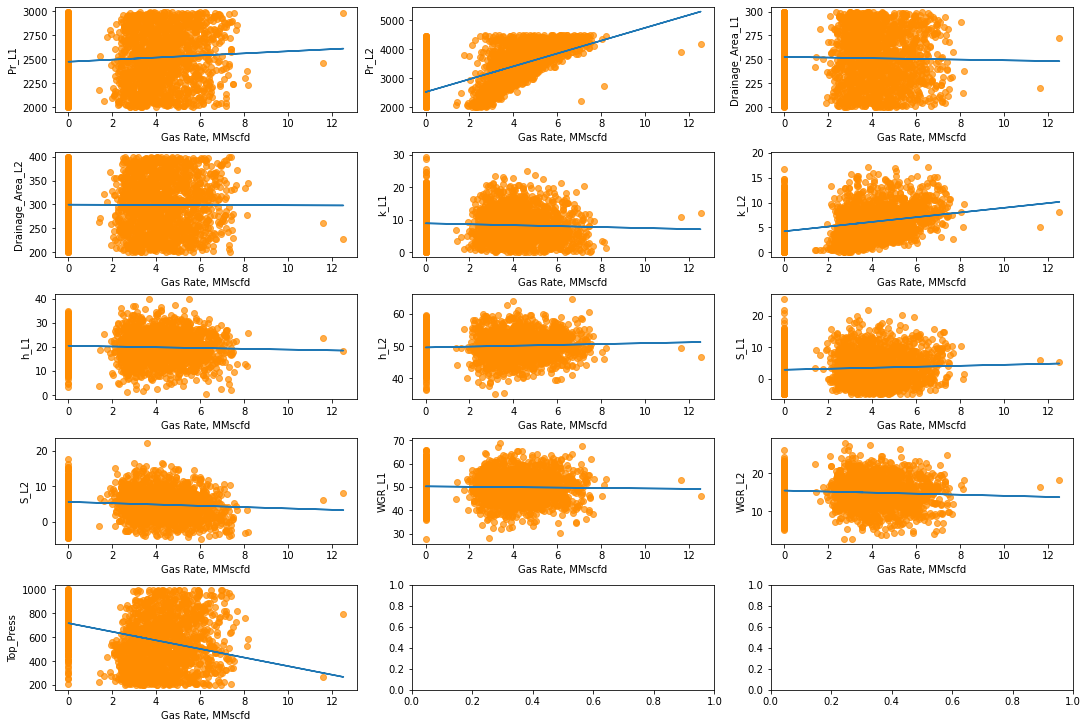

In [37]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(i)
    AX[xx,yy].scatter(dfS['Sol_Gas'], dfIn[df_col_names_In[ii]], color=(255/255, 140/255, 0/255), alpha=0.7)
    AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
    AX[xx,yy].set_ylabel(df_col_names_In[ii])
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
    x = dfS['Sol_Gas']
    y = dfIn[df_col_names_In[ii]]
    b, m = np.polynomial.polynomial.polyfit(x,y, 1)


    AX[xx,yy].plot(x, b + m * x, '-')

    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1


## Cross-Plots for Iterations with solutions

Total Input Variables =  13
Rows to Plot =  5


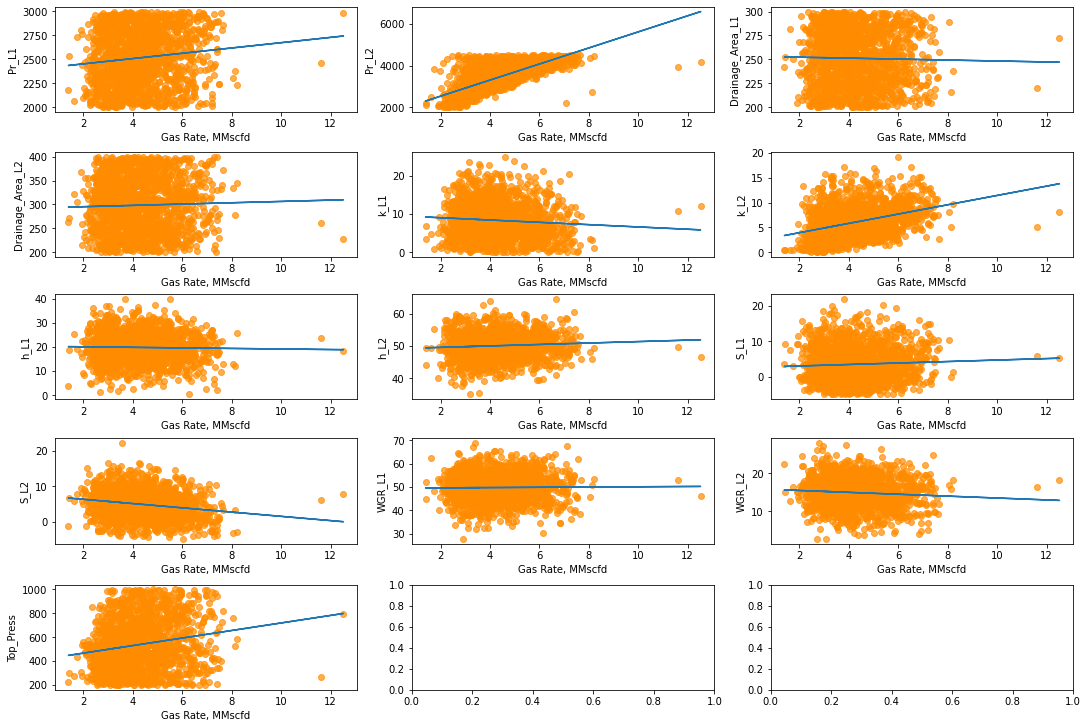

In [38]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(i)
    AX[xx,yy].scatter(dfS_In['Sol_Gas'], df_In_S[df_col_names_In[ii]], color=(255/255, 140/255, 0/255), alpha=0.7)
    AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
    AX[xx,yy].set_ylabel(df_col_names_In[ii])
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
    x = dfS_In['Sol_Gas']
    y = df_In_S[df_col_names_In[ii]]
    b, m = np.polynomial.polynomial.polyfit(x,y, 1)


    AX[xx,yy].plot(x, b + m * x, '-')

    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1

## Create new DataFrame with Solution and Input

In [39]:
# Create new DF to append Gas solution to input variables
corr_DF = dfIn.copy(deep=True)
corr_DF

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
0,2819.537719,2909.781297,237.760473,259.602491,12.302017,1.175045,14.112176,53.781189,-1.527850,2.270823,38.048251,17.269092,411.217122
1,2391.747727,2409.157713,262.579747,220.528854,9.632715,6.992615,18.291495,54.029495,-1.848006,-0.891137,38.094851,15.796731,639.971590
2,2885.425460,4134.454071,204.616228,293.648520,2.644836,11.989762,11.841674,49.225955,-0.628985,-0.113145,51.854879,17.191047,506.880211
3,2834.886578,3640.319936,227.815688,240.258060,10.959650,11.223587,18.221700,47.840410,-1.057849,7.056861,54.545665,18.203315,922.424004
4,2106.998828,2243.514951,215.195160,339.335539,8.393139,4.218549,10.532226,44.981530,3.028841,10.847308,51.497175,13.500905,754.842864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2936.692671,4183.108501,238.974951,394.567870,0.673826,5.647253,18.471028,45.777834,9.726302,9.812941,53.491319,15.181018,567.197479
1996,2479.300293,3333.652040,270.407704,261.564881,12.695866,3.551170,18.091852,44.958444,4.573698,6.772384,48.592590,20.805882,922.045831
1997,2875.221111,4103.854515,255.634022,274.203958,4.730002,5.120382,18.920838,49.503412,-4.728845,2.033261,55.668559,11.053498,386.546895
1998,2725.860327,3799.076911,232.144048,362.175102,5.374635,8.060504,17.060940,45.688315,-1.361103,4.928705,52.007030,18.927092,280.466698


In [40]:
## Add Gas Solutions Column
corr_DF['Gas_Sol'] = dfS['Sol_Gas']
corr_DF

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press,Gas_Sol
0,2819.537719,2909.781297,237.760473,259.602491,12.302017,1.175045,14.112176,53.781189,-1.527850,2.270823,38.048251,17.269092,411.217122,3.550655
1,2391.747727,2409.157713,262.579747,220.528854,9.632715,6.992615,18.291495,54.029495,-1.848006,-0.891137,38.094851,15.796731,639.971590,3.017908
2,2885.425460,4134.454071,204.616228,293.648520,2.644836,11.989762,11.841674,49.225955,-0.628985,-0.113145,51.854879,17.191047,506.880211,7.332740
3,2834.886578,3640.319936,227.815688,240.258060,10.959650,11.223587,18.221700,47.840410,-1.057849,7.056861,54.545665,18.203315,922.424004,4.854160
4,2106.998828,2243.514951,215.195160,339.335539,8.393139,4.218549,10.532226,44.981530,3.028841,10.847308,51.497175,13.500905,754.842864,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2936.692671,4183.108501,238.974951,394.567870,0.673826,5.647253,18.471028,45.777834,9.726302,9.812941,53.491319,15.181018,567.197479,5.424286
1996,2479.300293,3333.652040,270.407704,261.564881,12.695866,3.551170,18.091852,44.958444,4.573698,6.772384,48.592590,20.805882,922.045831,0.000000
1997,2875.221111,4103.854515,255.634022,274.203958,4.730002,5.120382,18.920838,49.503412,-4.728845,2.033261,55.668559,11.053498,386.546895,5.564018
1998,2725.860327,3799.076911,232.144048,362.175102,5.374635,8.060504,17.060940,45.688315,-1.361103,4.928705,52.007030,18.927092,280.466698,5.239747


In [41]:
## Check statistics for new DataFrame
corr_DF.describe()

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press,Gas_Sol
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2510.630310,3249.853868,251.498560,299.159817,8.445499,5.782776,19.975052,50.018383,3.388696,5.040360,49.935282,15.014346,600.044266,3.271341
std,287.085528,735.765049,28.462890,56.805641,5.065947,3.434472,6.034262,4.022888,5.058076,3.973266,5.898134,3.943478,231.972175,2.127442
min,2000.525375,2000.112853,200.081707,200.190221,0.006646,0.015425,0.304825,34.922536,-4.994837,-4.766371,27.734655,2.687314,200.144689,0.000000
25%,2266.608770,2594.958890,227.406801,250.618301,4.475367,3.052252,15.890486,47.410857,-0.536190,2.352922,45.990986,12.422910,407.753527,2.296736
50%,2519.777689,3216.520995,252.100655,299.184331,7.951380,5.539364,20.049681,49.945102,2.842399,5.068221,49.900993,15.034012,596.925759,3.610300
75%,2764.228378,3899.060953,275.997084,346.021489,11.972360,8.061730,24.135823,52.774304,6.664585,7.716508,53.884434,17.638151,797.250535,4.743931
max,2998.269535,4499.096429,299.985774,399.872787,29.481446,19.262452,39.968343,64.768990,25.494555,22.171860,68.684303,27.977425,999.816547,12.523400


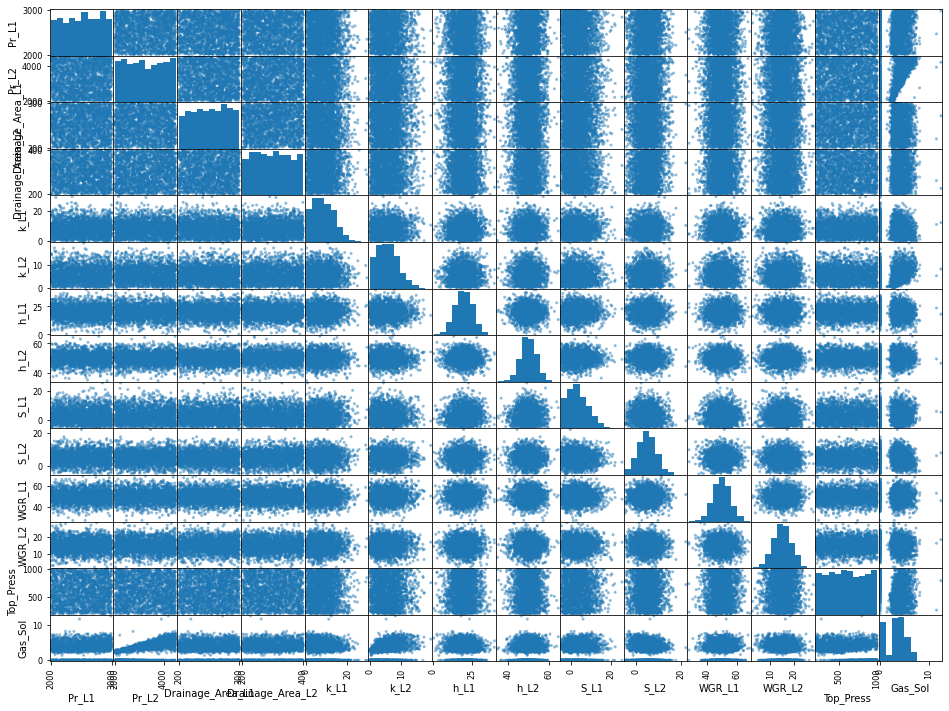

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_DF, figsize=(16,12), alpha = 0.5);

In [43]:
## Calculate correlation parameters PANDAS
corr_DF_Coeff = corr_DF.corr()

## Print Gas Rate vs Input Correlations
Gas_Sol_Coeff = corr_DF_Coeff['Gas_Sol']
type(Gas_Sol_Coeff)
Gas_Sol_Coeff

Pr_L1               0.081017
Pr_L2               0.641551
Drainage_Area_L1   -0.026622
Drainage_Area_L2   -0.004976
k_L1               -0.061709
k_L2                0.292488
h_L1               -0.056176
h_L2                0.070759
S_L1                0.066613
S_L2               -0.098461
WGR_L1             -0.031705
WGR_L2             -0.074483
Top_Press          -0.329532
Gas_Sol             1.000000
Name: Gas_Sol, dtype: float64

In [44]:
Gas_Sol_Coeff_df = pd.DataFrame(Gas_Sol_Coeff)
Gas_Sol_Coeff_df

,Gas_Sol
Pr_L1,0.081017
Pr_L2,0.641551
Drainage_Area_L1,-0.026622
Drainage_Area_L2,-0.004976
k_L1,-0.061709
k_L2,0.292488
h_L1,-0.056176
h_L2,0.070759
S_L1,0.066613
S_L2,-0.098461


In [45]:
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Gas_Sol'])
print(Gas_Sol_Coeff_df.index)
print(Gas_Sol_Coeff_df)

Index(['Pr_L1', 'Pr_L2', 'Drainage_Area_L1', 'Drainage_Area_L2', 'k_L1',
       'k_L2', 'h_L1', 'h_L2', 'S_L1', 'S_L2', 'WGR_L1', 'WGR_L2',
       'Top_Press'],
      dtype='object')
                   Gas_Sol
Pr_L1             0.081017
Pr_L2             0.641551
Drainage_Area_L1 -0.026622
Drainage_Area_L2 -0.004976
k_L1             -0.061709
k_L2              0.292488
h_L1             -0.056176
h_L2              0.070759
S_L1              0.066613
S_L2             -0.098461
WGR_L1           -0.031705
WGR_L2           -0.074483
Top_Press        -0.329532


In [46]:
print(Gas_Sol_Coeff_df)

                   Gas_Sol
Pr_L1             0.081017
Pr_L2             0.641551
Drainage_Area_L1 -0.026622
Drainage_Area_L2 -0.004976
k_L1             -0.061709
k_L2              0.292488
h_L1             -0.056176
h_L2              0.070759
S_L1              0.066613
S_L2             -0.098461
WGR_L1           -0.031705
WGR_L2           -0.074483
Top_Press        -0.329532


In [47]:

print(Gas_Sol_Coeff_df.index)

Index(['Pr_L1', 'Pr_L2', 'Drainage_Area_L1', 'Drainage_Area_L2', 'k_L1',
       'k_L2', 'h_L1', 'h_L2', 'S_L1', 'S_L2', 'WGR_L1', 'WGR_L2',
       'Top_Press'],
      dtype='object')


In [48]:
## Calculate correlation parameters NUMPY
np.corrcoef(corr_DF['Gas_Sol'],corr_DF['Pr_L1'])


array([[1.        , 0.08101672],
       [0.08101672, 1.        ]])

Text(0.5, 1.0, 'Correlation Between Input variables and Gas Rate (Solution)')

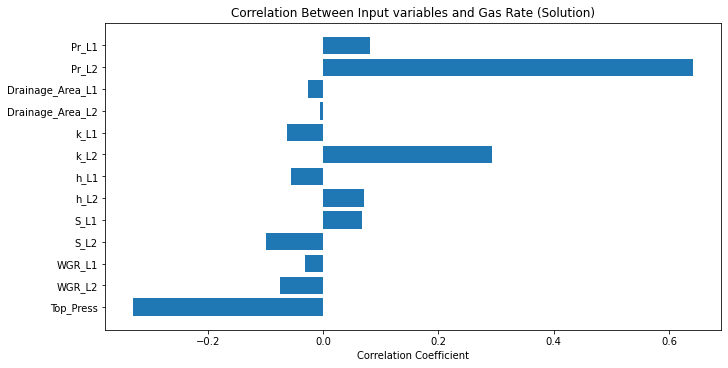

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5), layout ='constrained')

Input_Var_Names = Gas_Sol_Coeff_df.index
#print(Input_Var_Names)
y_pos = np.arange(len(Input_Var_Names))
performance = 3 + 10 * np.random.rand(len(Input_Var_Names))
error = np.random.rand(len(Input_Var_Names))

#print(Gas_Sol_Coeff_df['Gas_Sol'])

ax.barh(y_pos, Gas_Sol_Coeff_df['Gas_Sol'], align='center')
ax.set_yticks(y_pos, labels=Input_Var_Names)


ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Between Input variables and Gas Rate (Solution)')

## 8. QC Solution VLP + IPR

In [ ]:
## Replace 0 values for NAN (improve plot)
df_VI.replace(0, np.nan, inplace=True)
df_VI

In [ ]:
# Show VLP and IPR DF
df.head(i+1)

In [ ]:
df.describe()

# 9. Crear gráficas con libreria matplotlib

## 9.1 plot first sample VLP and IPR 

In [ ]:
## Specify iteration to plot VLP, IPR and Solution
Index_TP = 45

## Get Column names
df_col_names =df.columns.tolist()
print(df_col_names[Index_TP*3])
print(df_col_names[(Index_TP*3)+1])

plt.plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
         marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

plt.plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
         markerfacecolor=(192/255, 192/255, 192/255))

plt.plot(dfS['Sol_Gas'].iloc[Index_TP], dfS['Sol_Pressure'].iloc[Index_TP], label='Solution', marker = 'o', 
         markersize = 10,linestyle= '',
         markerfacecolor=(255/255, 140/255, 0/255) )

plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR (first sample)', weight='bold', color=(0/255, 0/255, 255/255))
plt.legend()
plt.xlim(left=0)

y_max = df['0_IPR'].max()
print("Gas Solution = ", dfS['Sol_Gas'].iloc[Index_TP])
print("Pressure Solution = ", dfS['Sol_Pressure'].iloc[Index_TP])
plt.show()

## 9.2 Plot multiple (IPR + VLP) curves

In [ ]:
## Get Column names
df_col_names =df.columns.tolist()

n = range(10)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df_VI[df_col_names[Qg_i]], df_VI[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i])
    plt.plot(df_VI[df_col_names[Qg_i]], df_VI[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i])
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [ ]:
## Get Column names
df_col_names =df.columns.tolist()
#print(df_col_names)
#print(df_col_names[1])

n = range(100)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i])
    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i])
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [ ]:
# Create new DataFrame to work with
df_VI = df.copy(deep=True)
df_VI